# Convolution Neural Network

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [88]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Text(0.5, 1.0, '[6]')

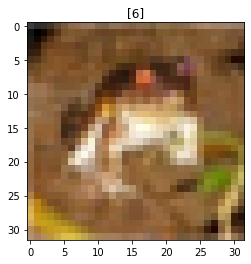

In [89]:
plt.imshow(x_train[0])
plt.title(y_train[0])

## Preprocessing

In [90]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [91]:
from keras.utils import np_utils

In [92]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [93]:
y_train.shape

(50000, 10)

## Model

In [94]:
from keras.models import Sequential

In [95]:
model = Sequential()

In [96]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,  Dropout, Activation

In [97]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))     

In [98]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 32)        18464     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)         

In [100]:
print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 10)


In [101]:
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 283s 904ms/step - loss: 1.6527 - accuracy: 0.3939 - val_loss: 1.2935 - val_accuracy: 0.5316
Epoch 2/20
313/313 [==============================] - 277s 884ms/step - loss: 1.2002 - accuracy: 0.5733 - val_loss: 1.0492 - val_accuracy: 0.6323
Epoch 3/20
313/313 [==============================] - 266s 851ms/step - loss: 1.0196 - accuracy: 0.6372 - val_loss: 0.9632 - val_accuracy: 0.6628
Epoch 4/20
313/313 [==============================] - 267s 854ms/step - loss: 0.9126 - accuracy: 0.6781 - val_loss: 0.8708 - val_accuracy: 0.6926
Epoch 5/20
313/313 [==============================] - 236s 753ms/step - loss: 0.8119 - accuracy: 0.7143 - val_loss: 0.7819 - val_accuracy: 0.7272
Epoch 6/20
313/313 [==============================] - 274s 875ms/step - loss: 0.7476 - accuracy: 0.7384 - val_loss: 0.7240 - val_accuracy: 0.7442
Epoch 7/20
313/313 [==============================] - 294s 939ms/step - loss: 0.6787 - accuracy: 0.7623 - val_loss: 0.7049 -

In [103]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 17s 55ms/step - loss: 0.7487 - accuracy: 0.7758


[0.7487043142318726, 0.7757999897003174]

In [104]:
import requests
from PIL import Image
from io import BytesIO

In [124]:
CIFAR10_classes = [
  'airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'
]

def class_name(ix):
  return CIFAR10_classes[np.array(ix).flatten()[0]]

In [111]:
def resize_image(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  width, height = img.size
  square_side = min(width, height)
  img = img.crop((
    np.ceil((width - square_side) / 2),
    np.ceil((height - square_side) / 2),
    np.ceil((width + square_side) / 2),
    np.ceil((height + square_side) / 2)
  ))

  img.thumbnail((32, 32))
  np_array = np.array(img) / 255

  return np_array

In [119]:
link = 'https://static01.nyt.com/images/2019/04/02/science/28SCI-ZIMMER1/28SCI-ZIMMER1-superJumbo.jpg'

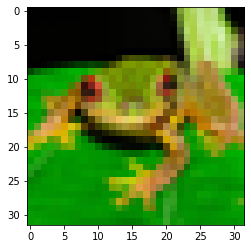

In [120]:
plt.imshow(resize_image(link))

In [121]:
np.argmax(model.predict(np.array([resize_image(link)])))

6

In [123]:
class_name(6)

'frog'

Text(0.5, 1.0, 'deer')

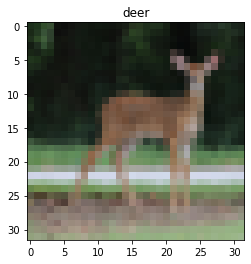

In [126]:
link1 = 'https://wehco.media.clients.ellingtoncms.com/img/photos/2019/06/17/resized_250499-1b-deer-0618_85-26607.JPG'
plt.imshow(resize_image(link1))
plt.title(class_name(np.argmax(model.predict(np.array([resize_image(link1)])))))